# Diagnosis of Diabetes using classification mining techniques
This project aims to test out different classifiers when it comes to the diabetes data
 1. [Link for paper](https://www.aircconline.com/ijdkp/V5N1/5115ijdkp01.pdf)
 2. [Link for dataset](https://www.kaggle.com/datasets/nancyalaswad90/review/versions/5?resource=download)

# EDA and visualization

In [38]:
# importing useful libraries (pandas, numpy, matplotlib, seaborn, sklearn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from statistics import mean 
# importing some parts of sklearn for machine learning tools
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix



The data contains no null values, is properly cast into either int or float.

`describe()` outputs some indicators for each column (mean,std,etc)

`info()` provides basic insight for number of records, number of non-null record, datatypes, etc.

`head()` shows the first 5 rows of the dataframe

In [4]:
# Importing the dataset, creating the dataframe and exploring it
df = pd.read_csv('diabetes.csv')
# df.describe()
# df.info()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


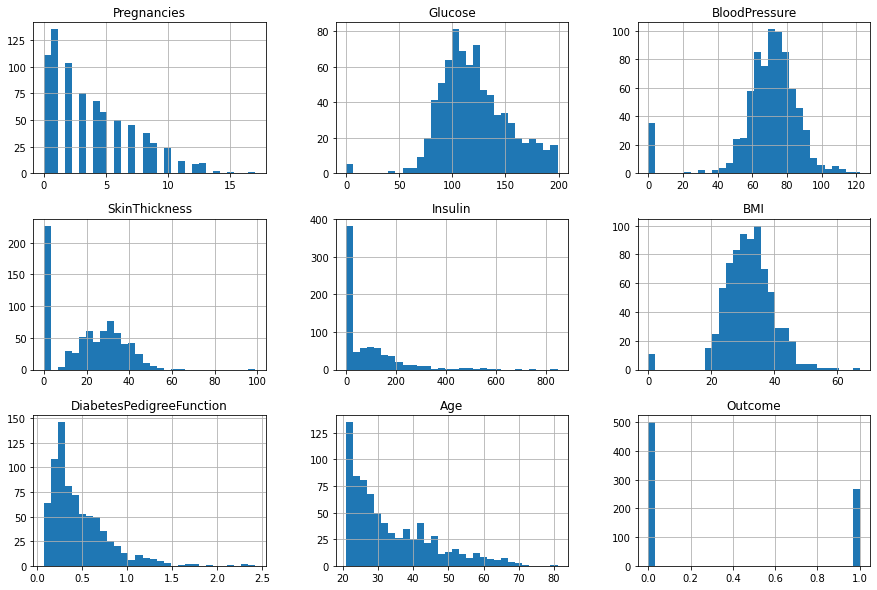

In [5]:
# Visualizing data distribution for each feature
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Defining functions for later use

In [7]:
# Plot Confusion Matrix and include accuracy and F1 score
def plot_confusion_matrix(y_test, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    mat = confusion_matrix(y_pred, y_test)
    names = np.unique(y_pred)
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=names, yticklabels=names)
    plt.xlabel('Truth')
    plt.ylabel('Predicted')
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average="weighted")

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)

# Following paper methodologies
## Classifiers used: 
1. Naive Bayes 
2. Decision tree

## Training methods:
1. Using a 70:30 train test split 
3. 10-fold cross validation

# Naive Bayes Classifier (Gaussian) results
As shown below, with a train test split of 70/30 we get an accuracy of about 78.7%, compared to the paper's 79.5% accuracy, not bad.

In [6]:
#first we split the data into features and label
Y = df['Outcome'] #label
X = df.drop('Outcome', axis=1) #features
# Then we need to split data set into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=4, shuffle=True)
# Init the Gaussian Classifier (data)
model = GaussianNB()
# Train the model 
model.fit(x_train, y_train)
# Predict Output 
y_pred = model.predict(x_test) 
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, classes=['0', '1'], normalize=False, title='Confusion matrix') 

NameError: name 'plot_confusion_matrix' is not defined

## Now let's try again but with an 80/20 test split
As shown, we get a higher accuracy (probably due to the increased training data size).

Accuracy: 0.7922077922077922
F1 Score: 0.7949190462951929


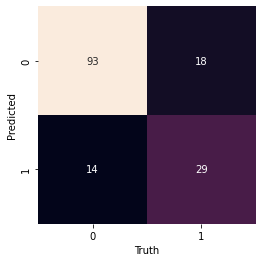

In [9]:
#first we split the data into features and label
Y = df['Outcome'] #label
X = df.drop('Outcome', axis=1) #features
# Then we need to split data set into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=0, shuffle=True)
# Init the Gaussian Classifier (data)
model = GaussianNB()
# Train the model 
model.fit(x_train, y_train)
# Predict Output 
y_pred = model.predict(x_test)  
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, classes=['0', '1'], normalize=False, title='Confusion matrix')

# Using 10-fold cross validation
We get a mean accruacy of 74.86%.
Note: this part was not included in the paper, but is added here for demonstration purposes

In [10]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_val_score(model, X, Y, cv=k_fold, n_jobs=1)
for i in range(len(scores)):
    score = '%.3f'%(scores[i]*100)
    print("Fold {i} Accuracy: {score}%".format(i=i+1, score=score))
    
print("Average Accuracy: {score}%".format(score=scores.mean()*100))

Fold 1 Accuracy: 80.519%
Fold 2 Accuracy: 76.623%
Fold 3 Accuracy: 71.429%
Fold 4 Accuracy: 71.429%
Fold 5 Accuracy: 71.429%
Fold 6 Accuracy: 72.727%
Fold 7 Accuracy: 85.714%
Fold 8 Accuracy: 74.026%
Fold 9 Accuracy: 67.105%
Fold 10 Accuracy: 77.632%
Average Accuracy: 74.8632946001367%


# Decision tree Classifier results

## using train test split of 70/30 
As shown below, with a train test split of 70/30 we get an accuracy of about 77%, compared to the paper's 76.96% accuracy, which are pretty close results.

Accuracy: 0.7705627705627706
F1 Score: 0.7735454876867559


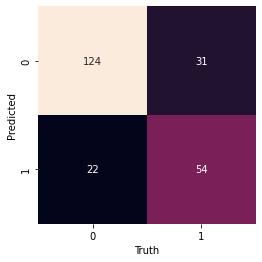

In [11]:
#first we split the data into features and label
Y = df['Outcome'] #label
X = df.drop('Outcome', axis=1) #features
# Then we need to split data set into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


# Create Decision Tree classifer object
tree = DecisionTreeClassifier(criterion="entropy", splitter="best",max_depth=3)

# Train Decision Tree Classifer
tree = tree.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = tree.predict(x_test)

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, classes=['0', '1'], normalize=False, title='Confusion matrix')

## using 10-fold cross validation
As shown below, the mean accuracy is about 74.47%, compared to the paper's 74.87% accuracy, which are pretty close results as well.

In [12]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_val_score(tree, X, Y, cv=k_fold, n_jobs=1)
for i in range(len(scores)):
    score = '%.3f'%(scores[i]*100)
    print("Fold {i} Accuracy: {score}%".format(i=i+1, score=score))
    
print("Average Accuracy: {score}%".format(score=scores.mean()*100))

Fold 1 Accuracy: 79.221%
Fold 2 Accuracy: 64.935%
Fold 3 Accuracy: 72.727%
Fold 4 Accuracy: 71.429%
Fold 5 Accuracy: 76.623%
Fold 6 Accuracy: 77.922%
Fold 7 Accuracy: 81.818%
Fold 8 Accuracy: 72.727%
Fold 9 Accuracy: 68.421%
Fold 10 Accuracy: 78.947%
Average Accuracy: 74.4771018455229%


## Visualizing the Decision Tree

In [14]:
#Visualizing the Decision Tree
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetesPredictionTree.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# Random Forest Classifier results

## using train test split of 70/30 


In [40]:
#first we split the data into features and label
Y = df['Outcome'] #label
X = df.drop('Outcome', axis=1) #features
# Then we need to split data set into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#create a random forest object
rf= RandomForestClassifier(n_estimators=1000)

#train the model and fit the model 
rf.fit(x_train, y_train)

#predict the model's response
RFpredictions = rf.predict(x_test)

# calculate the error for each cell, then the average absolte percentage error
errors = abs(RFpredictions - y_test)
all_error_percentage= mean(errors)*100

#print the results
print("total error =",all_error_percentage )
print(classification_report(y_test,RFpredictions))

# plot_confusion_matrix(y_test, RFpredictions, classes=['0', '1'], normalize=False, title='Confusion matrix')

total error = 21.21212121212121
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.77      0.60      0.68        85

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



# Logistic regression Classifier results

## using train test split of 70/30 


In [43]:
#first we split the data into features and label
Y = df['Outcome'] #label
X = df.drop('Outcome', axis=1) #features
# Then we need to split data set into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


# Create Logistic Regression classifer object
logisticReg = LogisticRegression()

# Train logistic Classifer
logisticReg.fit(x_train, y_train)

#Predict the response for test dataset
logisticRegPredictions = logisticReg.predict(x_test)

#score 
score=logisticReg.score(x_test, y_test)
print(score)

# Plot Confusion Matrix
# plot_confusion_matrix(y_test, logisticRegPredictions, classes=['0', '1'], normalize=False, title='Confusion matrix')


0.7835497835497836


## using 10-fold cross validation

In [23]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
scores_for_reg = cross_val_score(logisticReg, X, Y, cv=k_fold, n_jobs=1)
for i in range(len(scores_for_reg)):
    score = '%.3f'%(scores_for_reg[i]*100)
    print("Fold {i} Accuracy: {score}%".format(i=i+1, score=score))
    
print("Average Accuracy: {score}%".format(score=scores.mean()*100))

C:\Users\hazem\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hazem\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Fold 1 Accuracy: 87.013%
Fold 2 Accuracy: 79.221%
Fold 3 Accuracy: 72.727%
Fold 4 Accuracy: 76.623%
Fold 5 Accuracy: 74.026%
Fold 6 Accuracy: 74.026%
Fold 7 Accuracy: 77.922%
Fold 8 Accuracy: 72.727%
Fold 9 Accuracy: 71.053%
Fold 10 Accuracy: 80.263%
Average Accuracy: 74.4771018455229%


C:\Users\hazem\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
